In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
Path = '/content/drive/My Drive/DataSet'

In [27]:
cd {Path}

/content/drive/My Drive/DataSet


In [0]:
#import packages
import pandas as pd
import numpy as np

In [0]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [0]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [0]:
#read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')


In [0]:
#print the head
#df.head()



In [0]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [0]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [0]:
#len(data)

In [0]:
#new_data.head()

In [0]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [0]:
#new_data.head()

In [0]:
#new_data.shape

In [0]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

In [41]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


Epoch 1/1
 - 48s - loss: 0.0040


In [0]:
#predicting values
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [44]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

6.6849540868202375

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


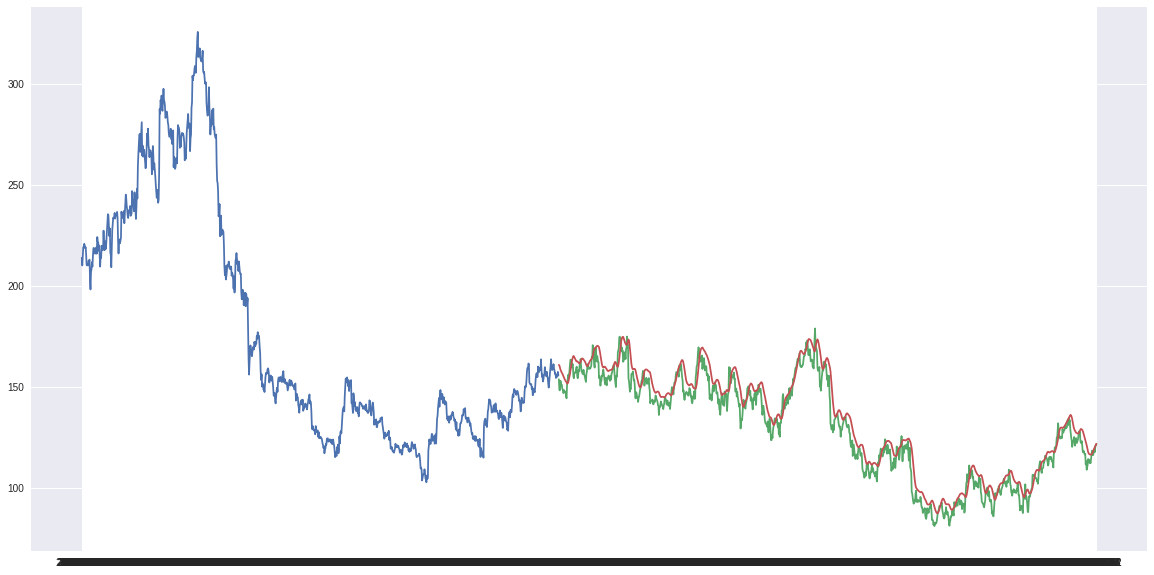

In [45]:
#for plotting
train = new_data[:987]
valid = new_data[987:]

valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [46]:
print ("Actual Close Price VS Predictions")
print (valid)

Actual Close Price VS Predictions
             Close  Predictions
Date                           
2015-01-08   153.7   160.808304
2015-01-07  148.45   160.482132
2015-01-06  148.15   159.718292
2015-01-05  152.95   158.716568
2015-01-02   152.5   157.996048
2015-01-01   150.7   157.466171
2014-12-31  150.95   156.966080
2014-12-30  149.05   156.543747
2014-12-29  148.65   156.056503
2014-12-26  146.85   155.535126
2014-12-24   146.9   154.893387
2014-12-23   148.3   154.227402
2014-12-22   147.5   153.698166
2014-12-19   147.4   153.232803
2014-12-18   147.5   152.836594
2014-12-17     145   152.520187
2014-12-16  144.25   152.089569
2014-12-15   151.6   151.563995
2014-12-12  152.95   151.563950
2014-12-11  155.65   151.989594
2014-12-10     156   152.860199
2014-12-09  154.85   153.973557
2014-12-08   158.3   155.071396
2014-12-05   161.1   156.336609
2014-12-04   163.4   157.818466
2014-12-03  163.25   159.499817
2014-12-02  163.35   161.170624
2014-12-01  159.55   162.719940
2014-1